In [ ]:
# Agriculture Farm data analysis
# 1. Load and preprocess the dataset
# 2. Inspect the dataset to identify the data information, structure,shape, datatypes and descriptive statistics.
# 3. Inspect the dataset to identity missing data, wrong datatypes, duplicats, otliers and wrong formats
# 4. Clean the data set by filling in missing values, correcting wrong datatypes, removing duplicates, and correcting wrong formats.
# 5. Analyze the dataset to find patterns and relationships and generate descriptive stsatistics.
# 6. Visualize the numeric distribution of variables using histograms, and creating a correlation heatmap to examine the relationship between soil and environment varriables.
# 7. Identify which varriables most influence fertilizer recommendations and crop with the highest average soil moisture.
# 8. Suggest appropriate irrigation adjustments for crops experiencing average temperaturs above 30degrees Celsius.
# 9. Save the cleaned dataset and export it as cleaned_precision_agriculture_data.csv.
# 10. Document insights and recommendations based on the analysis. 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# 1. Load the dataset and perform initial inspection
df = pd.read_csv('climate_action_data.csv')
# Intial inspection
df.head(20)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [4]:
# 2. Inspect the dataset to identify the data information,shape, datatypes and descriptive statistics.
# Data information
print("\nBelow is the information about the data:")
df.info()

print("\n\nThe datatypes of the data:")
print(df.dtypes)

print("\n\n Shape of the data:")
print(df.shape)

print("\nBelow are the descriptive statistics about the data:")
df.describe()


Below is the information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


The datatypes of the data:
Sensor_ID                        object
Date                             o

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [5]:
# 3. Inspect the dataset to identity missing data, wrong datatypes, duplicats, otliers and wrong formats
# 4. Clean the data set by filling in missing values, correcting wrong datatypes, removing duplicates, and correcting wrong formats.
# (i) Checking for missing data
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [6]:
# For category columns, we can fill missing values with the mode
Category_cols = ['Crop_Type']
for col in Category_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values  after replacing missing values in Crop_Type with the mode:")
print(df.isnull().sum())

Missing values  after replacing missing values in Crop_Type with the mode:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [7]:
# (ii) Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle Soil_Moisture(%) column with 'error' values
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil_Moisture(%)' with the median
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

# Handle the Soil_pH column with 'error' values
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Soil_pH' with the median
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

# Handle the Temperature(C) column with 'error' values
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce') # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Temperature' with the median
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())

# Handle the Humidity(%) column with 'error' values
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce') # convert  to numeric, coercing errors to Nan
# Fill NaN values in 'Humidity' with the median
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median()) 

# Handle the 'Fertilizer_Recommended(kg/ha)' column with 'error' values
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce') # convert to numeric, coercing errors to NaN
# Fill NaN values in 'Fertilizer_Recommended(kg/ha)' with the median
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

# Handle 'Irrigation_Recommended(mm)' column with 'error' values
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce') # convert to numeric, coercing errors to NaN
#Fill  NaN values in 'Irrigation_Recommended(mm)' with the median
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

In [8]:
# (iii) Wrong Data Types
numerical_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numerical_cols:
    if col in df.columns:
# (iv) Remove extreme outliers (beyond 3standard deviations)
         mean = df[col].mean()
         std = df[col].std()
         df[col] = np.where((df[col] < mean - 3*std)| (df[col] > mean + 3*std), np.nan, df[col])
         df[col] = df[col].fillna(df[col].median())        

In [9]:
# (v) Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [10]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
#Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [11]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [12]:
# 5. Analyze the dataset to find patterns and relationships and generate descriptive stsatistics.
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,798,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2026-02-04 07:45:33.834586624,44.790970,6.252997,26.468836,60.107009,87.401877,17.390989
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 06:00:00,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,2026-02-03 12:00:00,45.220000,6.295000,26.600000,59.600000,85.900000,17.400000
75%,2026-08-23 18:00:00,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460591,1.021265,4.867592,17.404889,34.805589,7.138402


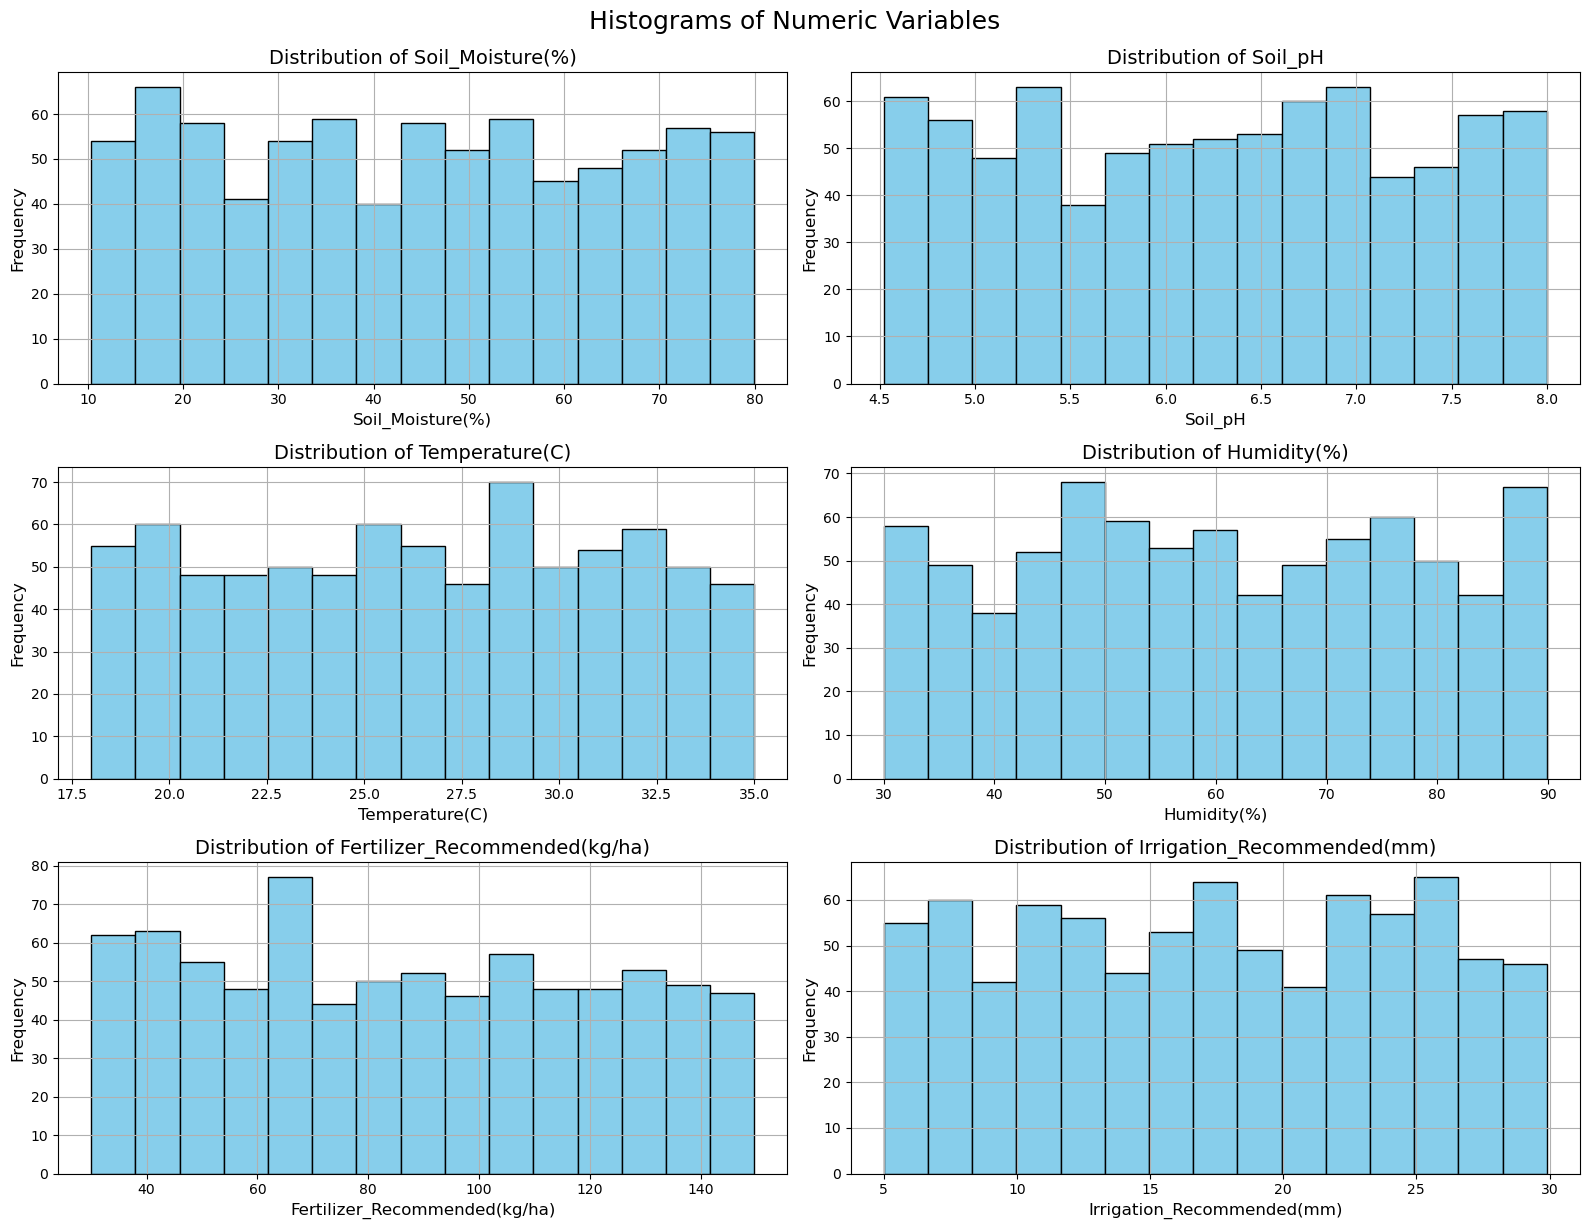

In [19]:
# 6. Visualize the numeric distribution of variables using histograms, and creating a correlation heatmap to examine the relationship between soil and environment varriables.

plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Histograms of Numeric Variables', fontsize=18, y=1.02)
plt.show()


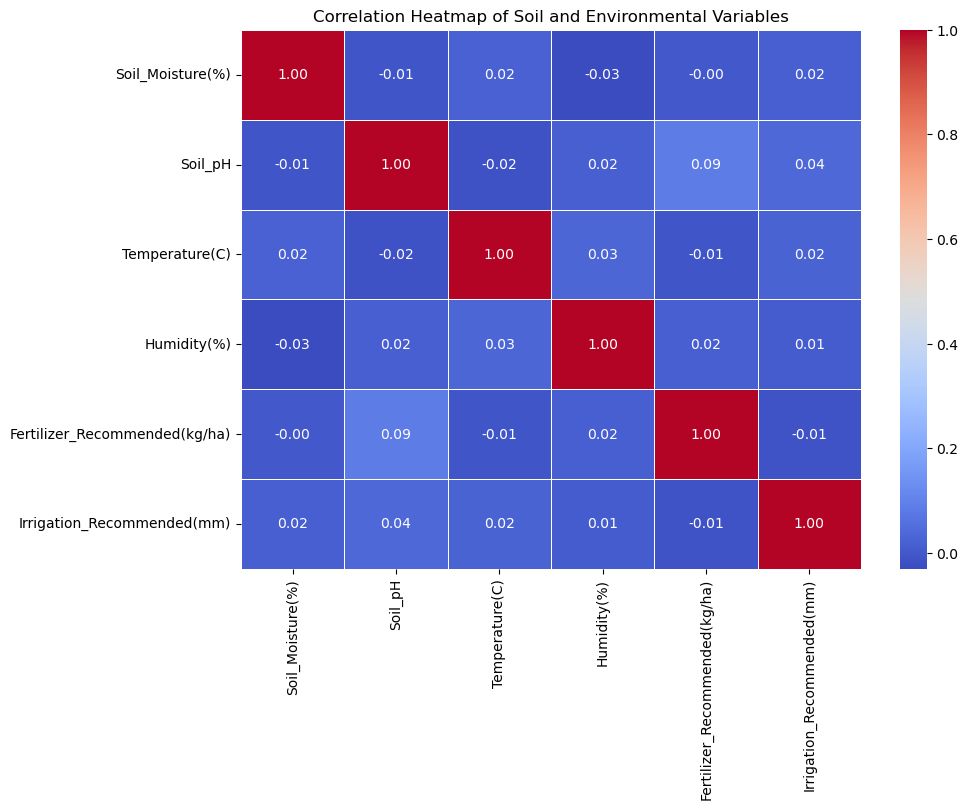

In [14]:
# correlation matrix
correlation = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Soil and Environmental Variables")
plt.show()

In [ ]:
# 7. Identify which varriables most influence fertilizer recommendations and crop with the highest average soil moisture.
# 8. Suggest appropriate irrigation adjustments for crops experiencing average temperaturs above 30degrees Celsius.
# 9. Save the cleaned dataset and export it as cleaned_precision_agriculture_data.csv.
# 10. Document insights and recommendations based on the analysis.

#variables most influencing fertiliser recommendation
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    corr_matrix = df[numerical_cols].corr()
    corr_fert = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
    print("variables influencing fertilizer recommendation:")
    print(corr_fert)

Top variables influencing fertilizer recommendation:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085333
Humidity(%)                      0.017329
Soil_Moisture(%)                -0.000944
Temperature(C)                  -0.007332
Irrigation_Recommended(mm)      -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [17]:
#crop type with highest average soil moisture
if 'Crop_Type' in df.columns and 'Soil_Moisture(%)' in df.columns:
    top_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
    print(f"Crop type with highest average soil moisture: {top_crop}")

Crop type with highest average soil moisture: Wheat


In [18]:
#irrigation suggestions for crops with AVG temp >30
if 'Crop_Type' in df.columns and 'Temperature(C)' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30]
    avg_moisture = high_temp_crops.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
    print("Suggested irrigation adjustments for high-temp crops:")
    print(avg_moisture.apply(lambda x: 'Increase' if x < 50 else 'Maintain'))

Suggested irrigation adjustments for high-temp crops:
Crop_Type
Beans       Increase
Lettuce     Increase
Maize       Increase
Tomatoes    Increase
Wheat       Increase
Name: Soil_Moisture(%), dtype: object


In [20]:
# Save the cleaned dataset as a CSV file
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)

In [ ]:
# Documented Insights & Recommendations
# Insights:
# Soil pH has the strongest (though weak) positive correlation with Fertilizer Recommendation (0.09).
# Soil Moisture values vary widely (range:10% to 80%).
# Wheat appears frequently and may have moderate water needs.

# Recommendations:
# 1. Fertilizer Management:
# Slight increase in fertilizer may be needed when soil pH is moderately low.
# Use pH-testing kits regularly and adjust fertilizer accordingly.

# 2. Irrigation Strategy:
# Monitor temperatures daily.
# Increase water supply by 20% when average daily temperature > 30°C.
# Adopt smart irrigation systems for precision.
# Ensure irrigation systems are efficient to reduce water loss through evaporation (e.g., drip irrigation).
# For temperatures > 33°C, consider morning or late evening irrigation to reduce water loss.

# 3. Data Logging:
# Ensure all sensors are reporting consistently (some missing Date and Crop_Type).
# Normalize and monitor for outliers in moisture and temperature.

# 4. Further Analysis Suggested:
# Use regression models to better predict fertilizer and irrigation needs.
# Map crop types to soil conditions for regional recommendations.

